Sept 30th-Oct 1st

In [1]:
from src.data.make_fna import *
from src.data.make_bc import *
from src.data.make_budds import *
from src.features.build_features import *
from nltk.tokenize import word_tokenize
from src.visualization.visualize import *

In [2]:
# Build data frames
fna = make_fna_data_frame(fna_filepath="../data/external/fna_keys.csv", frac_to_sample=0.1, balance_categories=True,
                          categories_to_keep=["key", "morphology", "taxon_identification", "distribution"])
bc = make_bc_data_frame(bc_filepath="../data/external/eflora-bc-full.csv",
                        frac_to_sample=1, balance_categories=True)
budds = make_budds_data_frame(budds_file_path="../data/raw/buddsfloraofcana00otta_djvu.xml", frac_to_sample=1,
                              balance_categories=True)
flora_data_frame = pd.concat([fna, bc, budds])

/Users/jocelynpender/miniconda3/envs/flora-prepper/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


Word cloud for all text data

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jocelynpender/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


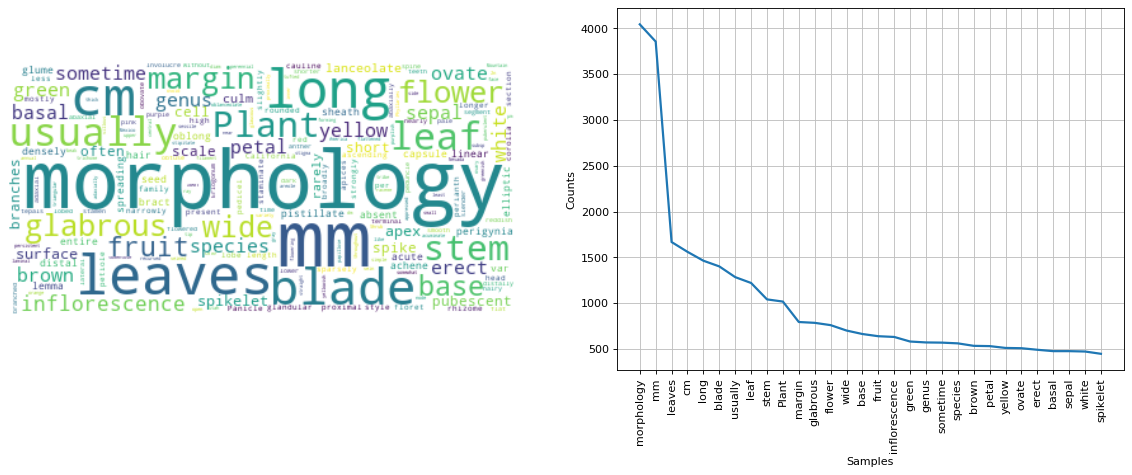

[('morphology', 4044), ('mm', 3856), ('leaves', 1668), ('cm', 1561), ('long', 1464), ('blade', 1402), ('usually', 1285), ('leaf', 1221), ('stem', 1042), ('Plant', 1018), ('margin', 795), ('glabrous', 786), ('flower', 761), ('wide', 702), ('base', 664), ('fruit', 640), ('inflorescence', 632), ('green', 582), ('genus', 572), ('sometime', 570), ('species', 562), ('brown', 535), ('petal', 532), ('yellow', 512), ('ovate', 509), ('erect', 492), ('basal', 477), ('sepal', 477), ('white', 473), ('spikelet', 448)]
hello


In [3]:
tokenized_stop_words = prepare_stop_words(custom_stop_words=["unknown", "accepted", "synonym",
                                                             "basionym", "source",
                                                             "note", "notes"])  # Find a way to keep numbers and elipses!
text = " ".join(text_string for text_string in flora_data_frame.text)
visualize_words(text, tokenized_stop_words)

Word clouds by classification

In [4]:
taxon_identification = " ".join(text_string for text_string in flora_data_frame[flora_data_frame.classification == "taxon_identification"].text)
morphology = " ".join(text_string for text_string in flora_data_frame[flora_data_frame.classification == "morphology"].text)
key = " ".join(text_string for text_string in flora_data_frame[flora_data_frame.classification == "key"].text)
habitat = " ".join(text_string for text_string in flora_data_frame[flora_data_frame.classification == "habitat"].text)

Taxon identification

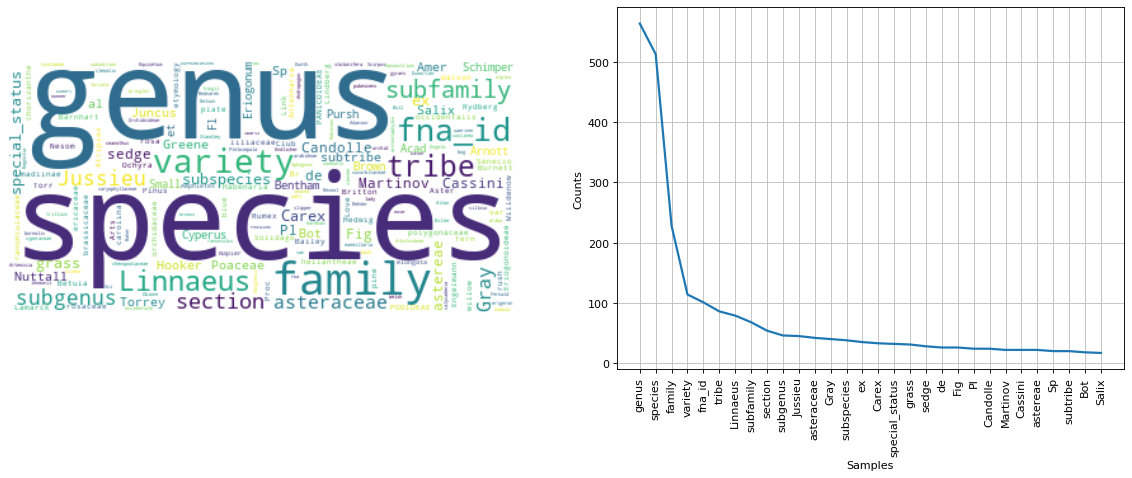

[('genus', 564), ('species', 513), ('family', 228), ('variety', 114), ('fna_id', 101), ('tribe', 86), ('Linnaeus', 79), ('subfamily', 68), ('section', 54), ('subgenus', 46), ('Jussieu', 45), ('asteraceae', 42), ('Gray', 40), ('subspecies', 38), ('ex', 35), ('Carex', 33), ('special_status', 32), ('grass', 31), ('sedge', 28), ('de', 26), ('Fig', 26), ('Pl', 24), ('Candolle', 24), ('Martinov', 22), ('Cassini', 22), ('astereae', 22), ('Sp', 20), ('subtribe', 20), ('Bot', 18), ('Salix', 17)]
hello


In [5]:
visualize_words(taxon_identification, tokenized_stop_words)

Morphology

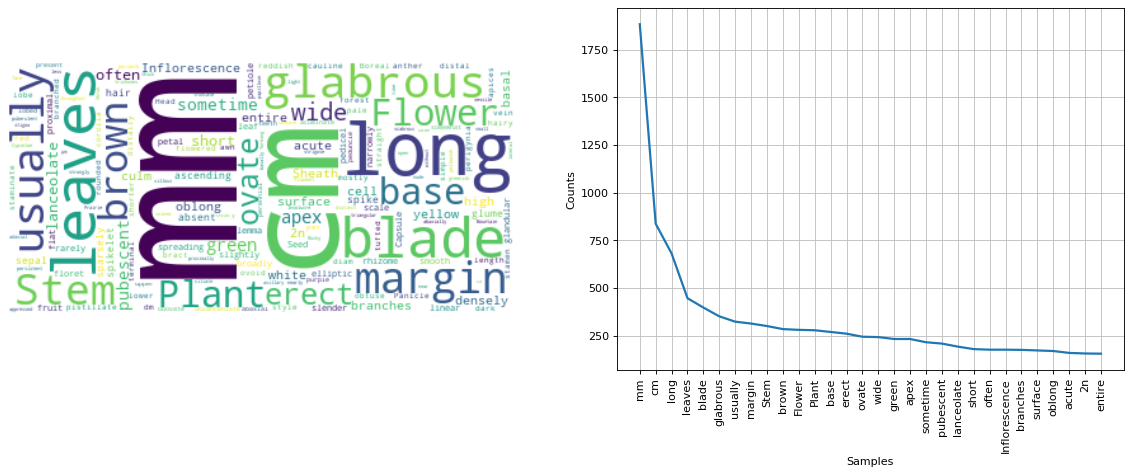

[('mm', 1884), ('cm', 837), ('long', 681), ('leaves', 446), ('blade', 397), ('glabrous', 351), ('usually', 323), ('margin', 313), ('Stem', 300), ('brown', 284), ('Flower', 280), ('Plant', 278), ('base', 269), ('erect', 260), ('ovate', 244), ('wide', 242), ('green', 232), ('apex', 232), ('sometime', 215), ('pubescent', 208), ('lanceolate', 192), ('short', 179), ('often', 176), ('Inflorescence', 176), ('branches', 175), ('surface', 172), ('oblong', 169), ('acute', 159), ('2n', 156), ('entire', 155)]
hello


In [6]:
visualize_words(morphology, tokenized_stop_words)

Keys

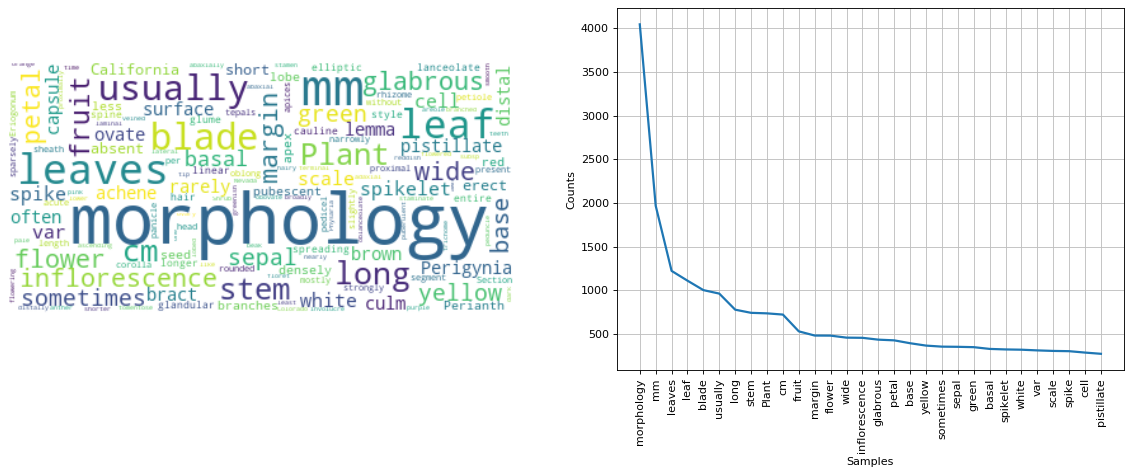

[('morphology', 4044), ('mm', 1968), ('leaves', 1222), ('leaf', 1110), ('blade', 1002), ('usually', 962), ('long', 778), ('stem', 742), ('Plant', 736), ('cm', 722), ('fruit', 530), ('margin', 482), ('flower', 481), ('wide', 458), ('inflorescence', 456), ('glabrous', 435), ('petal', 427), ('base', 394), ('yellow', 367), ('sometimes', 355), ('sepal', 353), ('green', 349), ('basal', 329), ('spikelet', 323), ('white', 320), ('var', 312), ('scale', 306), ('spike', 303), ('cell', 287), ('pistillate', 273)]
hello


In [7]:
visualize_words(key, tokenized_stop_words)

Habitat

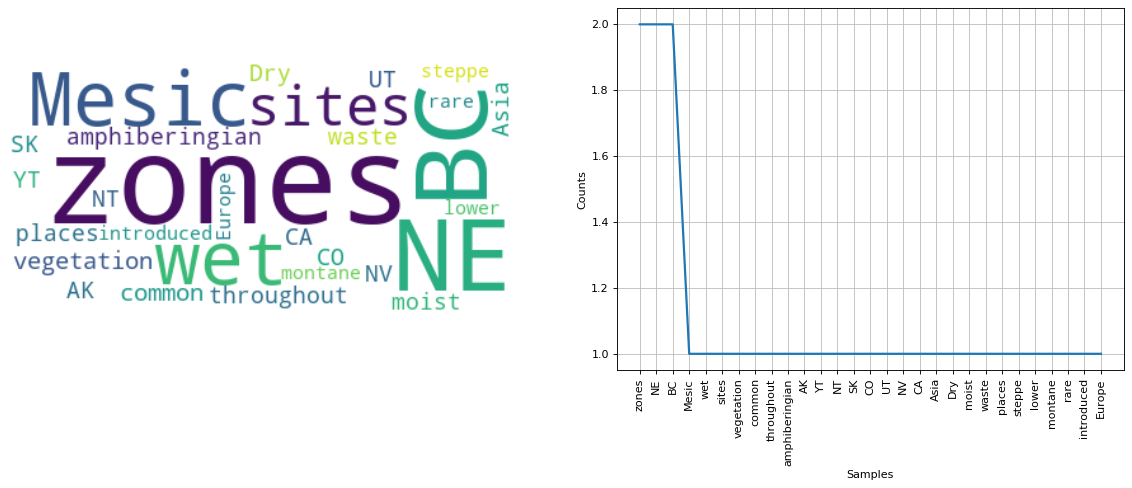

[('zones', 2), ('NE', 2), ('BC', 2), ('Mesic', 1), ('wet', 1), ('sites', 1), ('vegetation', 1), ('common', 1), ('throughout', 1), ('amphiberingian', 1), ('AK', 1), ('YT', 1), ('NT', 1), ('SK', 1), ('CO', 1), ('UT', 1), ('NV', 1), ('CA', 1), ('Asia', 1), ('Dry', 1), ('moist', 1), ('waste', 1), ('places', 1), ('steppe', 1), ('lower', 1), ('montane', 1), ('rare', 1), ('introduced', 1), ('Europe', 1)]
hello


In [8]:
visualize_words(habitat, tokenized_stop_words)


Word clouds by flora source

In [9]:
bc_text = " ".join(text_string for text_string in bc.text if text_string not in tokenized_stop_words)
budds_text = " ".join(text_string for text_string in budds.text if text_string not in tokenized_stop_words)
fna_text = " ".join(text_string for text_string in fna.text if text_string not in tokenized_stop_words)


BC

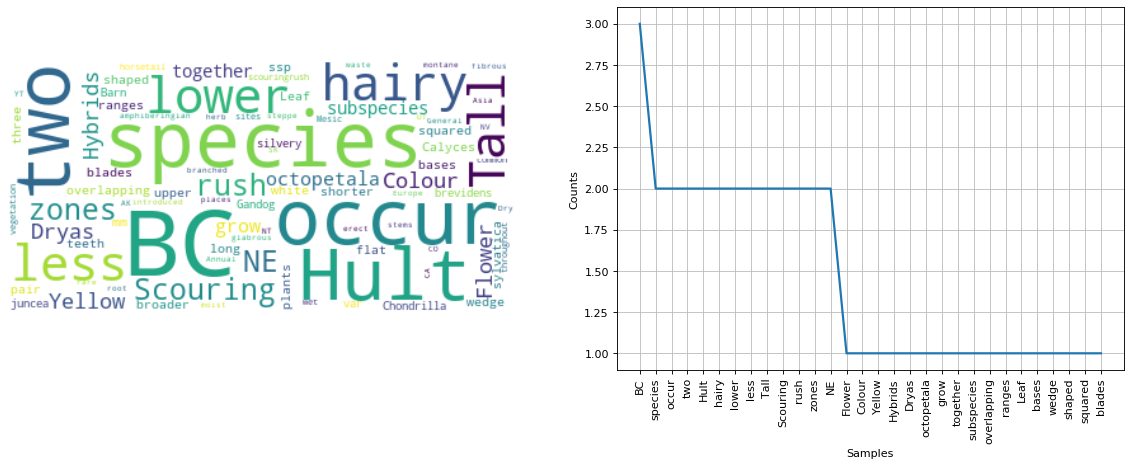

[('BC', 3), ('species', 2), ('occur', 2), ('two', 2), ('Hult', 2), ('hairy', 2), ('lower', 2), ('less', 2), ('Tall', 2), ('Scouring', 2), ('rush', 2), ('zones', 2), ('NE', 2), ('Flower', 1), ('Colour', 1), ('Yellow', 1), ('Hybrids', 1), ('Dryas', 1), ('octopetala', 1), ('grow', 1), ('together', 1), ('subspecies', 1), ('overlapping', 1), ('ranges', 1), ('Leaf', 1), ('bases', 1), ('wedge', 1), ('shaped', 1), ('squared', 1), ('blades', 1)]
hello


In [10]:
visualize_words(bc_text, tokenized_stop_words)

FNA

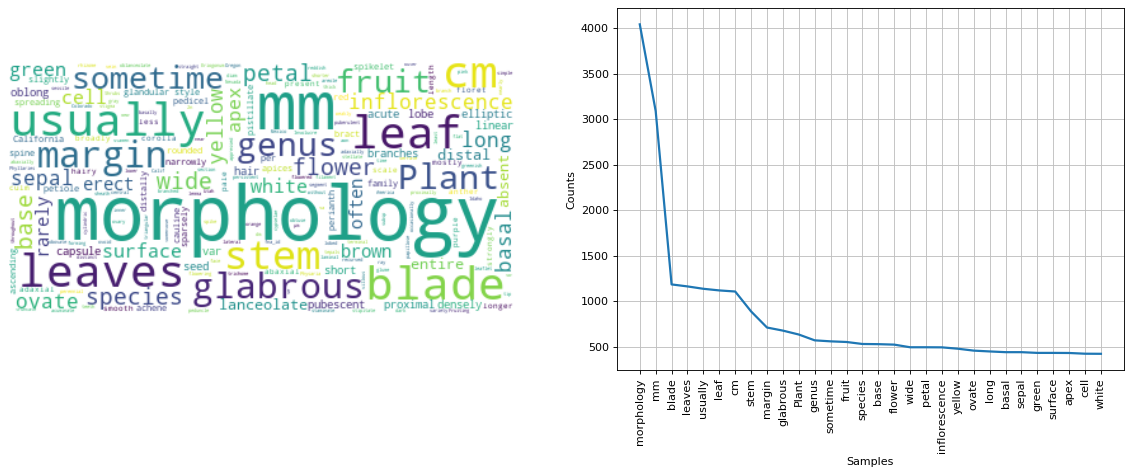

[('morphology', 4044), ('mm', 3090), ('blade', 1184), ('leaves', 1162), ('usually', 1136), ('leaf', 1118), ('cm', 1106), ('stem', 887), ('margin', 710), ('glabrous', 676), ('Plant', 633), ('genus', 569), ('sometime', 558), ('fruit', 551), ('species', 529), ('base', 527), ('flower', 522), ('wide', 493), ('petal', 493), ('inflorescence', 492), ('yellow', 477), ('ovate', 456), ('long', 447), ('basal', 439), ('sepal', 439), ('green', 431), ('surface', 431), ('apex', 430), ('cell', 422), ('white', 421)]
hello


In [11]:
visualize_words(fna_text, tokenized_stop_words)

Budds

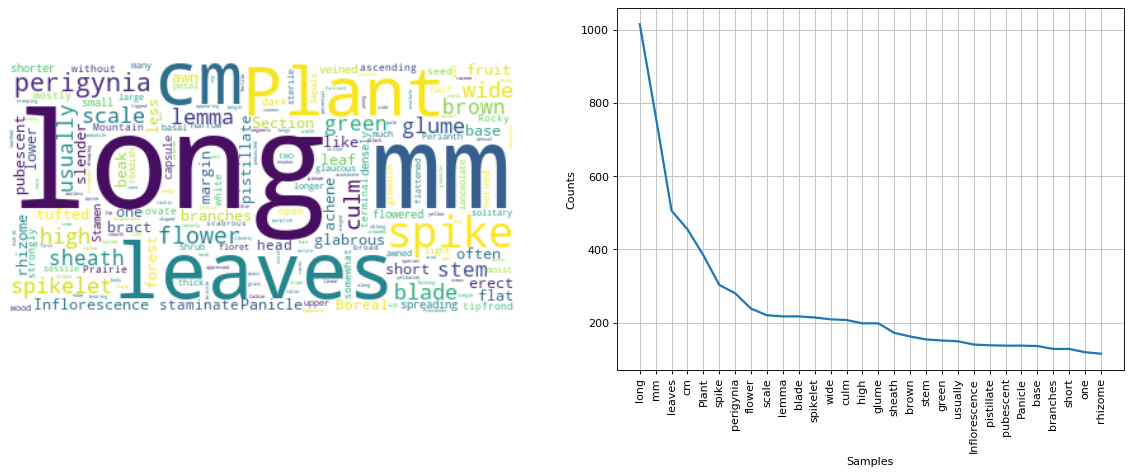

[('long', 1016), ('mm', 765), ('leaves', 506), ('cm', 455), ('Plant', 384), ('spike', 303), ('perigynia', 280), ('flower', 238), ('scale', 220), ('lemma', 217), ('blade', 217), ('spikelet', 214), ('wide', 209), ('culm', 207), ('high', 198), ('glume', 198), ('sheath', 172), ('brown', 162), ('stem', 154), ('green', 151), ('usually', 149), ('Inflorescence', 140), ('pistillate', 138), ('pubescent', 137), ('Panicle', 137), ('base', 136), ('branches', 128), ('short', 128), ('one', 119), ('rhizome', 115)]
hello


In [12]:
visualize_words(budds_text, tokenized_stop_words)


Key vs morphology UNCLEANED

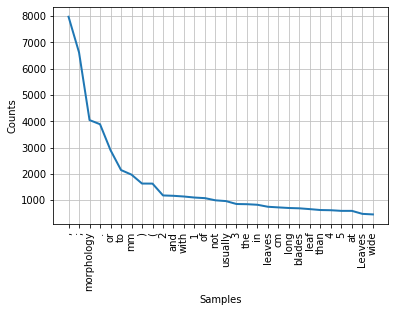

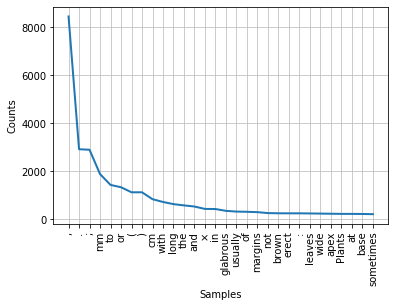

In [13]:
tokenized_key=word_tokenize(key)
fdist_key = FreqDist(tokenized_key)
fdist_key.plot(30,cumulative=False)
plt.show()

tokenized_morphology=word_tokenize(morphology)
fdist_morphology = FreqDist(tokenized_morphology)
fdist_morphology.plot(30,cumulative=False)
plt.show()


Key vs morphology CLEANED

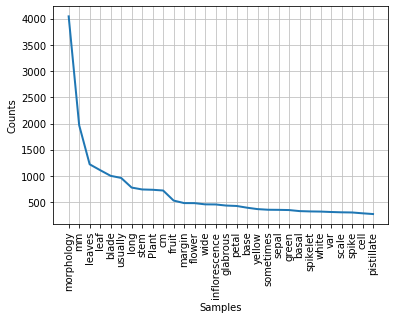

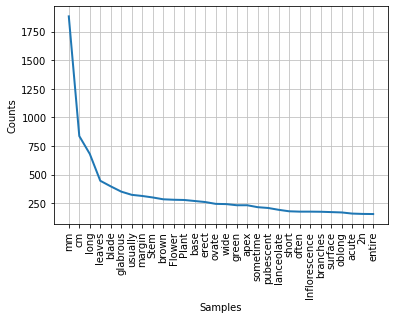

In [14]:
word_cloud_key = WordCloud(stopwords=tokenized_stop_words, 
                      background_color="white", collocations=False).process_text(key)
fdist_key = FreqDist(word_cloud_key)
fdist_key.plot(30,cumulative=False)
plt.show()

word_cloud_morphology = WordCloud(stopwords=tokenized_stop_words, 
                      background_color="white", collocations=False).process_text(morphology)
fdist_morphology = FreqDist(word_cloud_morphology)
fdist_morphology.plot(30,cumulative=False)
plt.show()

Oct. 2nd

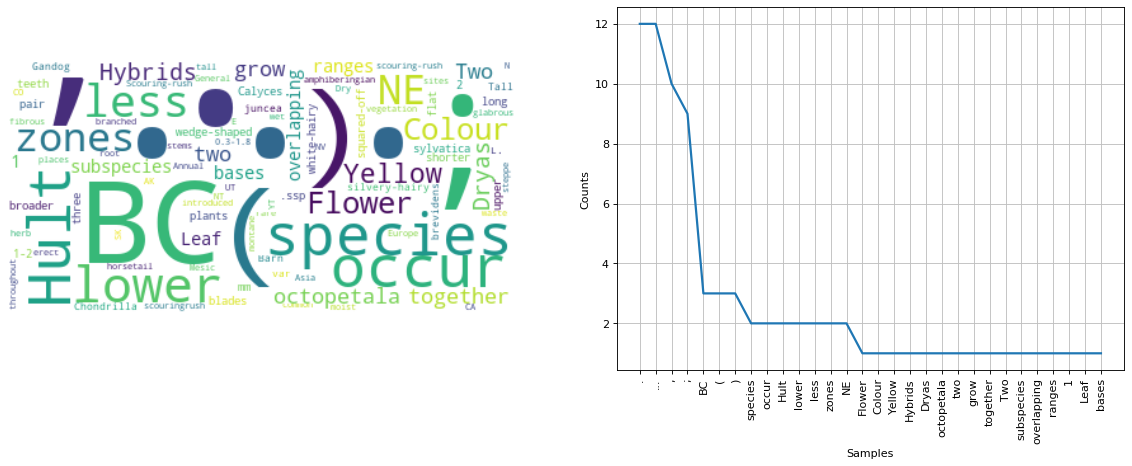

[('.', 12), ('...', 12), (',', 10), (';', 9), ('BC', 3), ('(', 3), (')', 3), ('species', 2), ('occur', 2), ('Hult', 2), ('lower', 2), ('less', 2), ('zones', 2), ('NE', 2), ('Flower', 1), ('Colour', 1), ('Yellow', 1), ('Hybrids', 1), ('Dryas', 1), ('octopetala', 1), ('two', 1), ('grow', 1), ('together', 1), ('Two', 1), ('subspecies', 1), ('overlapping', 1), ('ranges', 1), ('1', 1), ('Leaf', 1), ('bases', 1)]


In [18]:
plt.figure(figsize=(18, 6), dpi=80)

processed_text = flora_tokenizer(bc_text) # Tokenize
processed_text = [word for word in processed_text if word.lower() not in tokenized_stop_words]  # Remove stop words
fdist = FreqDist(processed_text)

plt.subplot(1, 2, 1)
wordcloud = WordCloud(background_color="white").generate_from_frequencies(fdist)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.subplot(1, 2, 2)
fdist.plot(30, cumulative=False)
plt.show()
print(fdist.most_common(30))

Oct. 4th
#### Are the habitat strings from bc and the distribution strings from fna similar enough to be merged?

In [ ]:
sample_dist = flora_data_frame[flora_data_frame.classification == 'distribution'].text.iloc[:10]
print("Distribution text: ", sample_dist)

sample_hab = flora_data_frame[flora_data_frame.classification == 'habitat'].text.iloc[:10]
print("Habitat text: ", sample_hab)

My conclusion is that we need to extract the habitat text that we have from fna and merge it with the bc strings.
For the purposes of this poster. merge the distribution and habitat strings from FNA together for training!

### Oct 8
### What happens to the key and morphology classifications if we implement stricter word tokenization?

In [ ]:
#key

word_cloud_key = WordCloud(stopwords=tokenized_stop_words, 
                      background_color="white", collocations=False).process_text(key)
fdist_key = FreqDist(word_cloud_key)
fdist_key.plot(30,cumulative=False)
plt.show()

# morphology
word_cloud_morphology = WordCloud(stopwords=tokenized_stop_words, 
                      background_color="white", collocations=False).process_text(morphology)
fdist_morphology = FreqDist(word_cloud_morphology)
fdist_morphology.plot(30,cumulative=False)
plt.show()
